In [225]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [226]:
#Generar datos de entrenamiento
train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [227]:
#Generar datos de entrenamiento
train_generator = train_data.flow_from_directory(
    "dataset_v2/train_dataset/train",
    target_size=(32, 32),
    color_mode="rgb",
    subset = "training",
    batch_size=32,
    class_mode="categorical")

Found 5078 images belonging to 10 classes.


In [228]:
#Generar datos de prueba
test_data = ImageDataGenerator(rescale = 1./255)

In [229]:
#Generar datos de prueba
test_generator = test_data.flow_from_directory(
    "dataset_v2/test_dataset/test",
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical")

Found 1270 images belonging to 10 classes.


## Construccion Red Neuronal (Modelo 1)

In [230]:
# Se inicializa CNN
model = Sequential()

In [231]:
#1 Convolution
capa1=Conv2D(filters = 32,
             kernel_size = (5, 5),                       
             input_shape = (32, 32, 3), 
             activation = "relu",
             strides=1,
             padding="same")

In [232]:
#2: Max Pooling
capa2=MaxPooling2D(pool_size = (5,5))

In [233]:
#3: Flattening
capa3=Flatten()

In [234]:
#4: Full Connection
capa4=Dense(100, activation = "relu")

In [235]:
#5: Outputs
outputs=Dense(10, activation = "softmax")

In [236]:
#6 Se construye toda la Red
model.add(capa1)
model.add(capa2)
model.add(capa3)
model.add(capa4)
model.add(outputs)

In [237]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 1152)              0         
                                                                 
 dense_23 (Dense)            (None, 100)               115300    
                                                                 
 dense_24 (Dense)            (None, 10)                1010      
                                                                 
Total params: 118,742
Trainable params: 118,742
Non-trainable params: 0
_______________________________________________

In [238]:
#Compilar CNN
model.compile(loss = "categorical_crossentropy",
                   optimizer = "adam",
                   metrics=['accuracy'])

## Entrenar Modelo



In [239]:
cnn=model.fit(train_generator,
                   batch_size=200,
                   epochs=20,
                   validation_data=(test_generator)
               )              

Epoch 1/20


2023-05-08 16:17:17.589694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


157/159 [============================>.] - ETA: 0s - loss: 1.0833 - accuracy: 0.6531

2023-05-08 16:17:21.463633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


159/159 [==============================] - 4s 26ms/step - loss: 1.0824 - accuracy: 0.6538 - val_loss: 0.6755 - val_accuracy: 0.7906
Epoch 2/20
159/159 [==============================] - 4s 25ms/step - loss: 0.6295 - accuracy: 0.8143 - val_loss: 0.5561 - val_accuracy: 0.8677
Epoch 3/20
159/159 [==============================] - 4s 25ms/step - loss: 0.4926 - accuracy: 0.8545 - val_loss: 0.3669 - val_accuracy: 0.8976
Epoch 4/20
159/159 [==============================] - 4s 25ms/step - loss: 0.4262 - accuracy: 0.8779 - val_loss: 0.3292 - val_accuracy: 0.9102
Epoch 5/20
159/159 [==============================] - 4s 25ms/step - loss: 0.3641 - accuracy: 0.8982 - val_loss: 0.3033 - val_accuracy: 0.9181
Epoch 6/20
159/159 [==============================] - 4s 25ms/step - loss: 0.3175 - accuracy: 0.9106 - val_loss: 0.3330 - val_accuracy: 0.9016
Epoch 7/20
159/159 [==============================] - 4s 24ms/step - loss: 0.3014 - accuracy: 0.9149 - val_loss: 0.2465 - val_accuracy: 0.9339
Epoch 8/20

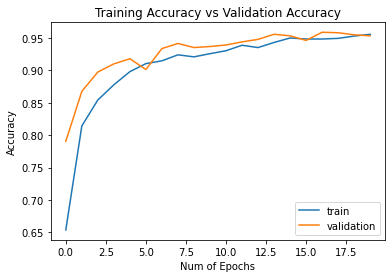

In [240]:
#Gráfica de entrenamiento y pruebas
plt.figure(0)  
plt.plot(cnn.history['accuracy'], label='training accuracy')  
plt.plot(cnn.history['val_accuracy'], label='val accuracy')   
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

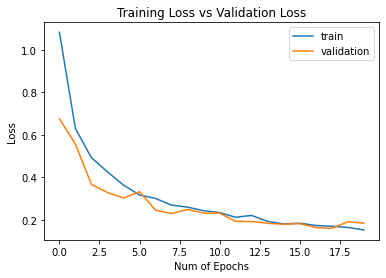

In [241]:
#Gráfica de entrenamiento y validación
plt.figure(1)  
plt.plot(cnn.history['loss'], label='training loss')  
plt.plot(cnn.history['val_loss'], label='val loss')   
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

## Pruebas del modelo 1



In [242]:
#Conjunto de predicciones
y_pred = model.predict(test_generator).round()
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

11/40 [=======>......................] - ETA: 0s

2023-05-08 16:25:45.587584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


40/40 [==============================] - 0s 11ms/step


array([3, 2, 2, ..., 0, 1, 2])

In [243]:
#Datos correctos
true_classes = test_generator.classes
y_test = np.array(true_classes)
y_test

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [244]:
#Metricas de Entrenamiento
scores = model.evaluate(train_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

  7/159 [>.............................] - ETA: 3s - loss: 0.1633 - accuracy: 0.9554

2023-05-08 16:25:50.399372: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


159/159 [==============================] - 3s 20ms/step - loss: 0.1642 - accuracy: 0.9492

accuracy: 94.92%


In [245]:
#Metricas de Prueba
scores = model.evaluate(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/40 [===========>..................] - ETA: 0s - loss: 0.2075 - accuracy: 0.9531

2023-05-08 16:25:54.710262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


40/40 [==============================] - 0s 11ms/step - loss: 0.1853 - accuracy: 0.9535

accuracy: 95.35%


In [246]:
#Scores
from sklearn.metrics import classification_report
#Etiquetas
class_labels = list(test_generator.class_indices.keys())   
class_labels
report = classification_report(true_classes, y_pred_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   GuideSign       0.18      0.20      0.19       247
          M1       0.06      0.06      0.06        52
          M4       0.53      0.54      0.53       675
          M5       0.02      0.02      0.02        45
          M6       0.05      0.04      0.04        28
          M7       0.05      0.05      0.05        99
          P1       0.02      0.02      0.02        53
      P10_50       0.00      0.00      0.00        20
         P12       0.07      0.05      0.06        20
          W1       0.00      0.00      0.00        31

    accuracy                           0.33      1270
   macro avg       0.10      0.10      0.10      1270
weighted avg       0.33      0.33      0.33      1270



In [247]:
#Matriz de Confusión
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_pred_classes, y_test)
print(cm)   

[[ 50  10 144  10   6  18  12   5   4  15]
 [ 11   3  21   1   1   3   2   4   1   1]
 [132  29 362  25  11  62  30   5  11  13]
 [  7   3  23   1   4   0   2   0   1   1]
 [  5   1  10   1   1   2   1   0   0   0]
 [ 20   5  47   5   1   5   2   5   2   0]
 [  6   1  31   1   1   5   1   0   0   1]
 [  6   0  12   1   0   1   1   0   0   0]
 [  3   0   8   0   0   1   1   0   1   0]
 [  7   0  17   0   3   2   1   1   0   0]]


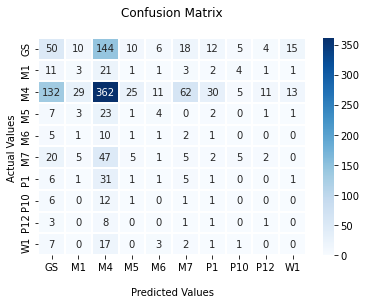

In [248]:
#Matriz de Confusión
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cm, annot=True, 
            linewidths=2, fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['GS', 'M1', 'M4', 'M5', 'M6', 'M7', 'P1', 'P10', 'P12', 'W1'])
ax.yaxis.set_ticklabels(['GS', 'M1', 'M4', 'M5', 'M6', 'M7', 'P1', 'P10', 'P12', 'W1'])

plt.show()

In [249]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_classes)

0.33385826771653543

In [250]:
#Presicion
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_classes, average=None)

array([0.18248175, 0.0625    , 0.53235294, 0.02380952, 0.04761905,
       0.05434783, 0.0212766 , 0.        , 0.07142857, 0.        ])

In [251]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_classes, average=None)

array([0.20242915, 0.05769231, 0.5362963 , 0.02222222, 0.03571429,
       0.05050505, 0.01886792, 0.        , 0.05      , 0.        ])

In [252]:
#f1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_classes, average=None)

array([0.19193858, 0.06      , 0.53431734, 0.02298851, 0.04081633,
       0.05235602, 0.02      , 0.        , 0.05882353, 0.        ])